<a href="https://colab.research.google.com/github/viniciussz7/projeto_RegressaoLinear/blob/main/projeto_regressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📚 Importação das Bibliotecas

Primeiro, importamos todas as bibliotecas necessárias para nossa análise e visualização dos dados.

- **pandas 🐼**
- **matplotlib 🎨**
- **seaborn 📈**
- **scikit-learn 🛠️**
- **numpy 🔢**

In [12]:
# Instalação de pacotes necessários diretamente no ambiente do Colab
%pip install matplotlib scikit-learn pandas seaborn

# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,mean_squared_error, r2_score, accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sns.set(style='whitegrid')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\vinic\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 📁 Carregando Dataset

A base de dados utilizada no projeto é um dataset do Instagram que faz análise dos dados dos maiores influenciadores da plataforma.


Disponível no kaggle em:
[Top Instagram Influencers Data](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned)

In [13]:
url = 'https://drive.usercontent.google.com/u/0/uc?id=1Dnf11YkRn5l9vQ8_AjA4ddFHnnaS--i_&export=download'
dataset = pd.read_csv(url)
dataset

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


### > Explicando as variáveis

- **rank**: Rank do influenciador com base na quantidade de seguidores.
- **channel_info**: Nome de usuário do influenciador no Instagram.
- **influence_score**: Pontuação de influência dos usuários, calculada com base em menções, importância e popularidade.
- **posts**: Número de postagens feitas até o momento.
- **followers**: Quantidade de seguidores do usuário.
- **avg_likes**: Média de curtidas nas postagens do influenciador (curtidas totais/postagens totais).
- **60_day_eng_rate**: Taxa de engajamento dos últimos 60 dias do influenciador, como fração do total de engajamentos feitos até agora.
- **new_post_avg_like**: Média de curtidas em novas postagens.
- **total_likes**: Total de curtidas que o usuário recebeu em suas postagens (em bilhões).
- **country**: País ou região de origem do usuário.



Nesse caso, a variável dependente é `influence_score`, ou seja, a variável que será predita a partir das demais variáveis independentes. Para entender a relação entre as variáveis, podemos calcular a matriz de correlação e a distruibuição da variável `influence_score` em relação as outras variáveis numéricas.



## 🛠️ Pré-processamento e Tratamento dos Dados
O dataset utilizado contém colunas que representam grandezas numéricas com sufixos indicando a ordem de magnitude ('k' para milhares, 'm' para milhões e 'b' para bilhões). Para realizar análises e cálculos precisos, é necessário converter esses valores em números reais, isso é crucial para garantir a consistência e a precisão das análises realizadas com o dataset. Ao eliminar os sufixos, os dados numéricos são padronizados, facilitando a comparação e a interpretação dos resultados.


Além disso, foram retiradas as colunas `channel_info` e `country` que são strings e não influenciam na variável alvo `influence_score`.


Dados que contém valores NaN impedem que alguns algoritmos de aprendizado de máquina funcionem corretamente, dessa forma foi feito um tratamento para corrigir os valores NaN.

In [14]:
## Função para converter valores com sufixo 'k', 'm' ou 'b' para valores reais
def convert_to_real_value(value):

  if isinstance(value, str):
    if value.endswith('k'):
      return float(value[:-1]) * 1000
    elif value.endswith('m'):
      return float(value[:-1]) * 1000000
    elif value.endswith('b'):
      return float(value[:-1]) * 1000000000
    elif value.endswith('%'):
      return float(value[:-1]) * 0.01
  return value  # Retorna o valor original se não houver sufixo

In [15]:
# Lista das colunas que serão convertidas para valores reais
cols_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']

# Aplicando a função convert_to_real_value para as colunas selecionadas
for col in cols_to_convert:
  dataset[col] = dataset[col].apply(lambda x: convert_to_real_value(x))

# Retirando colunas de strings
dataset_no_str = dataset.drop(['channel_info', 'country'], axis=1)	

In [16]:
# Identificando colunas com valores NaN
nan_columns = dataset_no_str.columns[dataset_no_str.isna().any()].tolist()
print(f"Colunas com valores NaN: {nan_columns}")

# Mostrando quantas linhas possui valores NaN
count_nan_rows = dataset_no_str.isna().any(axis=1).sum()
print(f"Número de linhas com valores NaN: {count_nan_rows}")

# Removendo linha com valores NaN
dataset_no_str = dataset_no_str.dropna()
dataset_no_str

Colunas com valores NaN: ['60_day_eng_rate']
Número de linhas com valores NaN: 1


,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,1,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10
1,2,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10
2,3,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09
3,4,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10
4,5,91,6800.0,334100000.0,1900000.0,0.0020,665300.0,1.250000e+10
...,...,...,...,...,...,...,...,...
195,196,71,2300.0,33200000.0,623800.0,0.0140,464700.0,1.400000e+09
196,197,81,3800.0,33200000.0,390400.0,0.0064,208000.0,1.500000e+09
197,198,79,770.0,33200000.0,193300.0,0.0026,82600.0,1.492000e+08
198,199,78,2300.0,33000000.0,719600.0,0.0142,467700.0,1.700000e+09


## 📊 Visualização dos Dados


Nesse caso, a variável dependente é `influence_score`, ou seja, a variável que será predita a partir das demais variáveis independentes. Para entender a relação entre as variáveis, podemos calcular a matriz de correlação e a distruibuição da variável `influence_score` em relação as outras variáveis numéricas.

                       rank  influence_score     posts  followers  avg_likes  \
rank               1.000000        -0.365048 -0.053706  -0.698459  -0.313838   
influence_score   -0.365048         1.000000  0.161117   0.368377   0.050963   
posts             -0.053706         0.161117  1.000000   0.057880  -0.338492   
followers         -0.698459         0.368377  0.057880   1.000000   0.377821   
avg_likes         -0.313838         0.050963 -0.338492   0.377821   1.000000   
60_day_eng_rate    0.004245        -0.081891 -0.324068  -0.100905   0.754587   
new_post_avg_like -0.286194         0.037025 -0.294304   0.299661   0.900695   
total_likes       -0.464757         0.238100  0.231823   0.667151   0.384539   

                   60_day_eng_rate  new_post_avg_like  total_likes  
rank                      0.004245          -0.286194    -0.464757  
influence_score          -0.081891           0.037025     0.238100  
posts                    -0.324068          -0.294304     0.231823  
fol

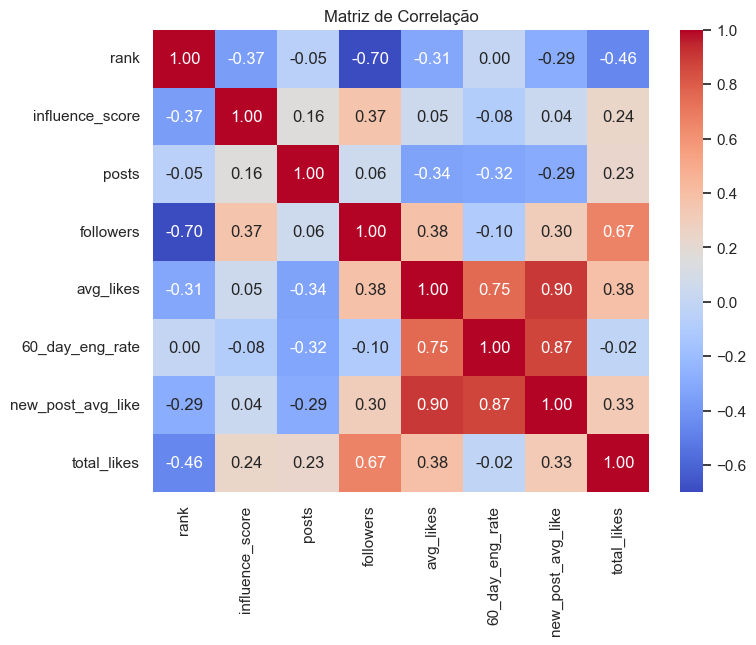

In [17]:
# Calcula a matriz de correlação
correlation_matrix = dataset_no_str.corr()

# Mostra a matriz de correlação
print(correlation_matrix)

# Plota a matriz de correlação como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

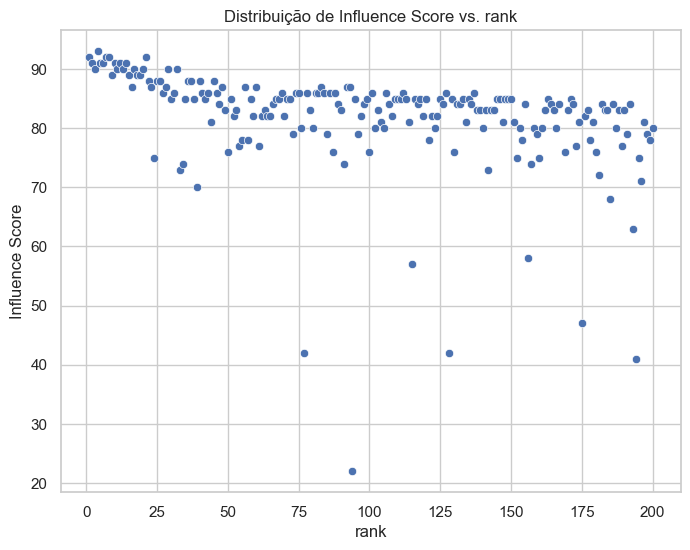

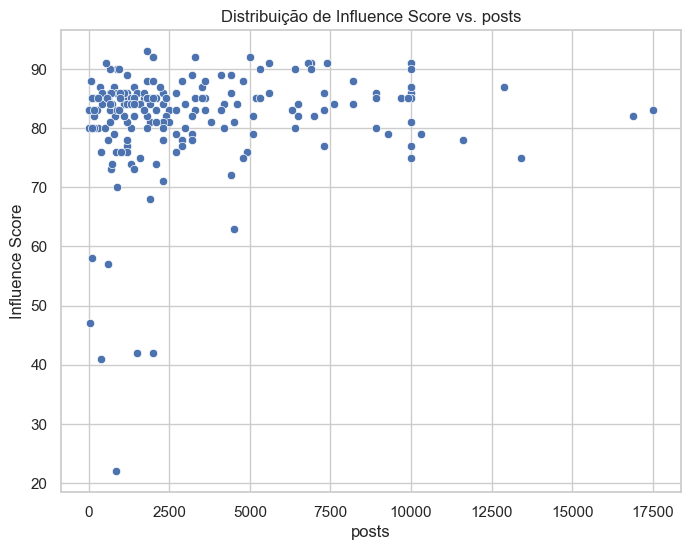

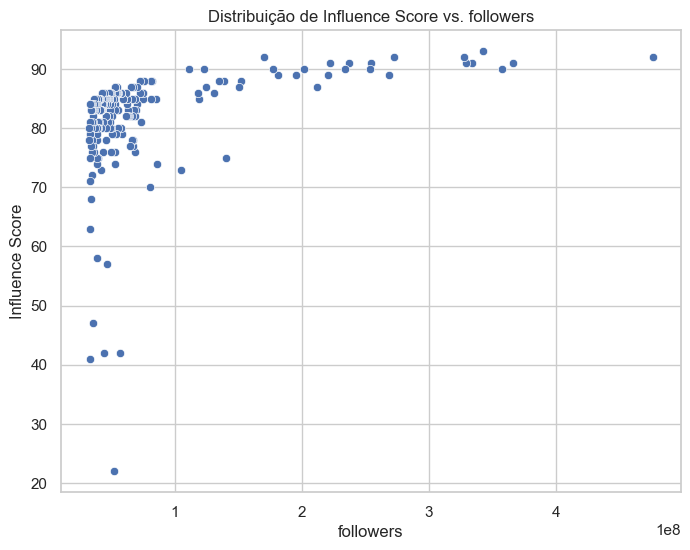

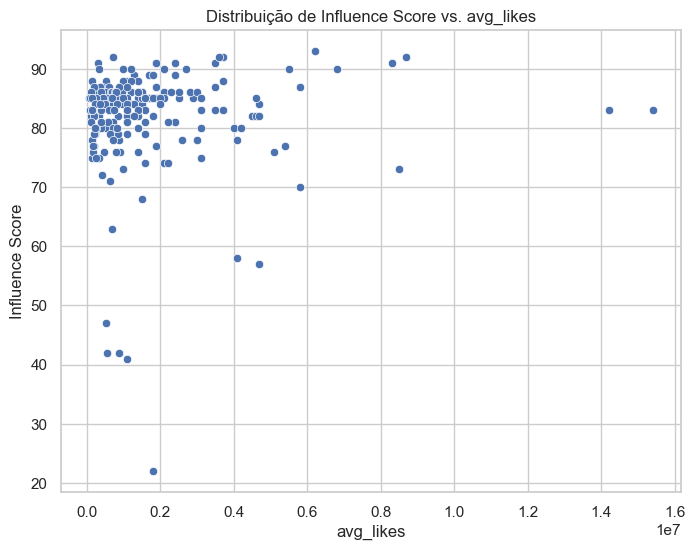

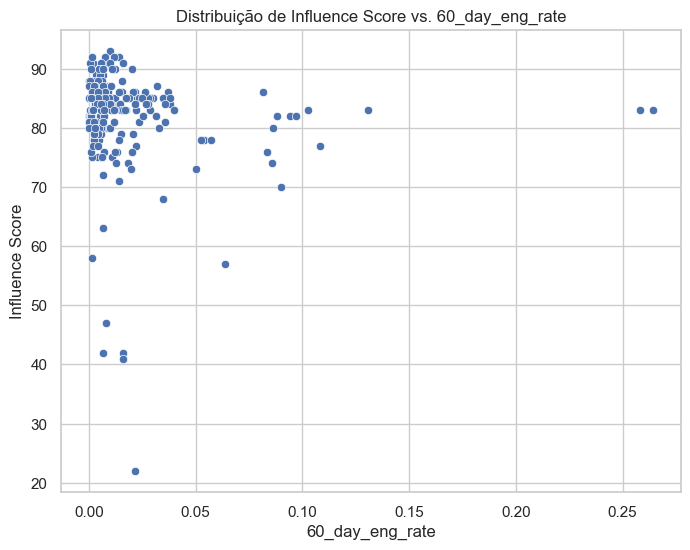

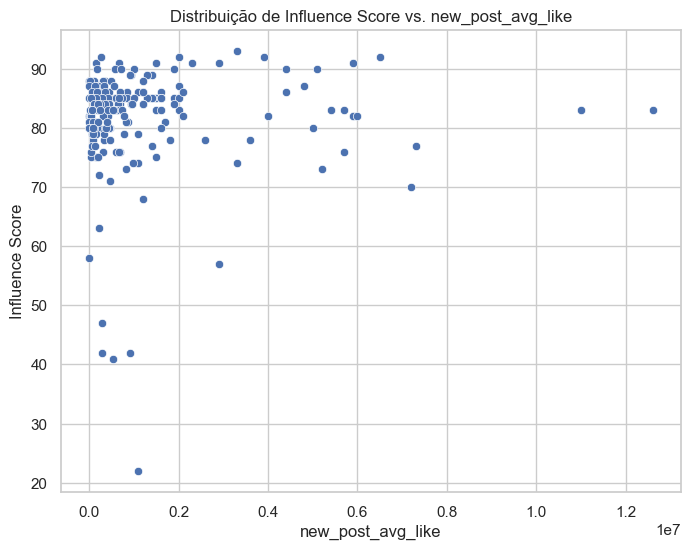

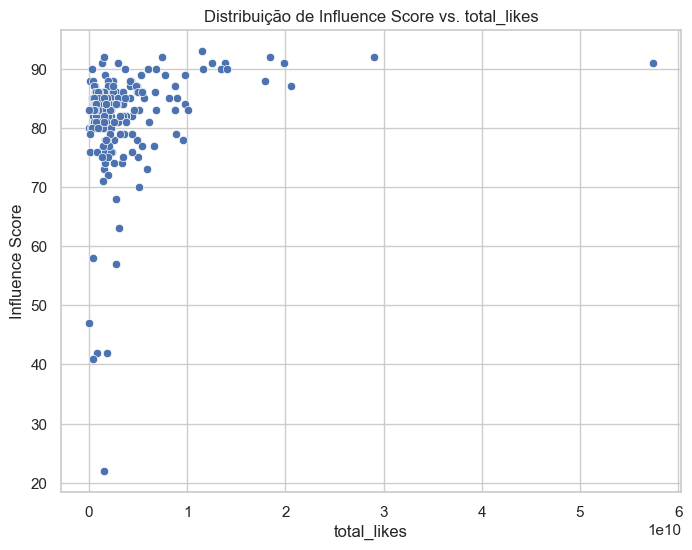

In [18]:
# Iterar pelas colunas numéricas, exceto 'influence_score'
for column in dataset_no_str.columns:
    if column != 'influence_score':
        # Criar o scatter plot
        plt.figure(figsize=(8, 6))  # Ajustar tamanho da figura
        sns.scatterplot(x=column, y='influence_score', data=dataset_no_str)
        plt.title(f'Distribuição de Influence Score vs. {column}')
        plt.xlabel(column)
        plt.ylabel('Influence Score')
        plt.show()

## 🗂️ Divisão do Dataset

Agora vamos dividir o dataset em um conjunto de treinamento e um conjunto de teste. Usaremos 80% dos dados para treinamento e 20% para teste. Antes de dividir, é necessário separar a variável alvo (Y) das demais (X) para realizar o treinamento e, posteriormente, fazer a comparação para testar o modelo.

In [19]:
# Separação das features da variável alvo

X = dataset_no_str.drop('influence_score', axis=1)
y = dataset_no_str['influence_score'] # Variável alvo

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Treinamendo do Modelo

Com os dados divididos, podemos treinar o modelo de regressão linear.

In [20]:
model = LinearRegression()
# Treinando o modelo
model.fit(X_train, y_train)

LinearRegression()

## 📐 1ª Avaliação do Modelo

In [21]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2:.2f}')
print(f'RMSE: {mse ** 0.5:.2f}')
print(f'RMAE: {mae:.2f}')

R²: 0.10
RMSE: 10.67
RMAE: 5.75


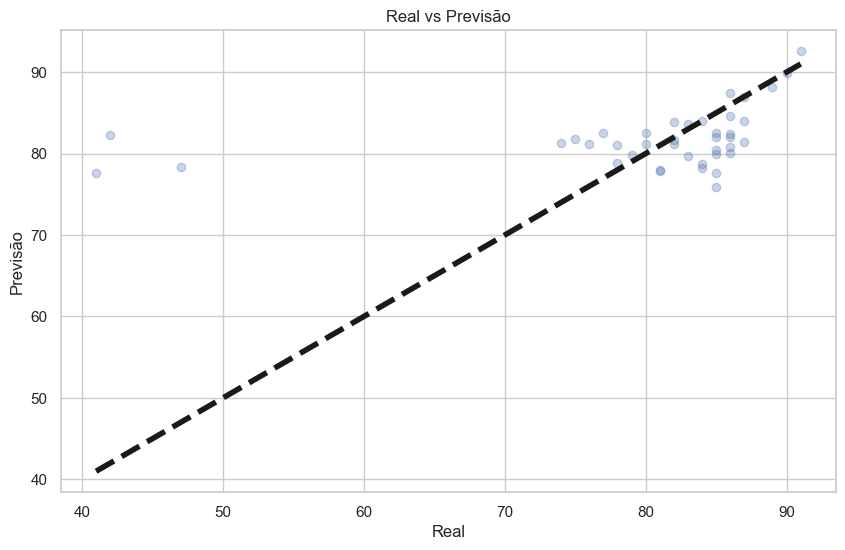

In [22]:
# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)  # Cria o gráfico de dispersão
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Adiciona a linha diagonal
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Real vs Previsão')
plt.show()

### 🔎 Análise e Interpretação das métricas

▪️ **R²: 0.10** -> Indica que o modelo explica apenas 10% da variância na variável alvo. 

*Conclusão:* Um R² de 0.10 é considerado baixo, sugerindo que o modelo tem um poder preditivo limitado e que as variáveis independentes não estão capturando bem a relação com a variável dependente.


▪️ **RMSE: 10.67** -> Representa o desvio padrão dos resíduos (diferença entre valores reais e previstos). Indica que, em média, as previsões do modelo erram por volta de 10.67 unidades da variável alvo.


*Conclusão:* Pode ser considerado moderado, dependendo da escala da variável alvo e do contexto do problema. Se a variável alvo tiver uma grande escala, um RMSE de 10.67 pode ser aceitável. No entanto, se a variável alvo tiver uma pequena escala, um RMSE de 10.67 pode indicar erros significativos.


▪️ **MAE: 5.75** -> Representa a média dos erros absolutos das previsões do modelo. Indica que, em média, as previsões do modelo erram por volta de 5.75 unidades da variável alvo.

*Conclusão:* Um MAE de 5.75 é menor que o RMSE, o que sugere que pode haver alguns outliers nos dados que estão influenciando o RMSE.